In [ ]:
# In the G/B Column, 0 is bad candidate and 1 is good candidate.

In [3]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [4]:
fname = 'Candidate_Sell.csv'
sell = pd.read_csv(fname)
sell.head(10)

,CandidateSell,G/B
0,Allyce is a new grad bilingual (Spanish/ Engli...,1
1,"Aleksandra is compassionate, highly resourcefu...",1
2,Alexis has 4 years of experience as a medical ...,1
3,Raekia has over 5 years of experience as Payme...,1
4,Juan has 4 1/2 years of COVID site leading exp...,1
5,Angelica has 8 months of experience as a Surgi...,1
6,Sara has almost 2 years of experience as a Med...,1
7,"Tanya has over 10 years of Administrative, Dat...",1
8,NaN,1
9,Cheyenne has a little under a year of experien...,1


In [6]:
sell.info()
sell.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CandidateSell  536 non-null    object
 1   G/B            542 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.6+ KB


,G/B
count,542.000000
mean,0.463100
std,0.499097
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


/Users/wangmengjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    291
1    251
Name: G/B, dtype: int64


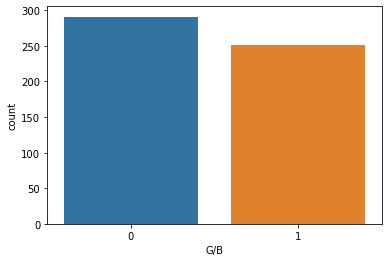

In [7]:
import seaborn as sns

sns.countplot(sell['G/B'], order=sell['G/B'].value_counts().index);
print(sell['G/B'].value_counts())

## Data Visualization

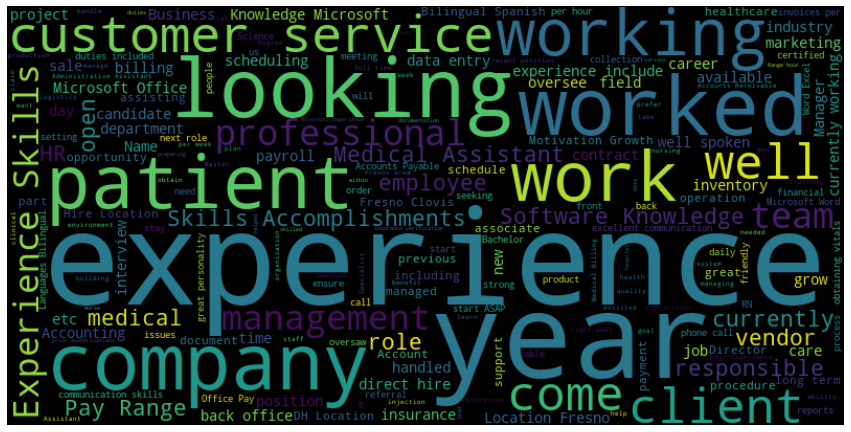

In [68]:
# Using WordCloud
from wordcloud import WordCloud

# Combine all messages into one large string
combined_text = ' '.join(sell['CandidateSell'])

wordcloud = WordCloud(width=800, height=400).generate(combined_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 1. Basic Text Cleaning

In [17]:
sell['CandidateSell'] = sell['CandidateSell'].astype(str)

In [18]:
text = sell['CandidateSell']
text

0      Allyce is a new grad bilingual (Spanish/ Engli...
1      Aleksandra is compassionate, highly resourcefu...
2      Alexis has 4 years of experience as a medical ...
3      Raekia has over 5 years of experience as Payme...
4      Juan has 4 1/2 years of COVID site leading exp...
                             ...                        
537     Zach has been applauded for reaching $4.07M i...
538    Eduardo has achieved her Bachelor of Science i...
539    Keng comes with over two years of experience w...
540    Natalee is professional with excellent communi...
541    Will has spent many years on and off in food a...
Name: CandidateSell, Length: 542, dtype: object

In [19]:
# Change to Lowercase
text_lowercase = text.str.lower()
text_lowercase

0      allyce is a new grad bilingual (spanish/ engli...
1      aleksandra is compassionate, highly resourcefu...
2      alexis has 4 years of experience as a medical ...
3      raekia has over 5 years of experience as payme...
4      juan has 4 1/2 years of covid site leading exp...
                             ...                        
537     zach has been applauded for reaching $4.07m i...
538    eduardo has achieved her bachelor of science i...
539    keng comes with over two years of experience w...
540    natalee is professional with excellent communi...
541    will has spent many years on and off in food a...
Name: CandidateSell, Length: 542, dtype: object

In [21]:
# Remove Punctuation
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

In [22]:
text_no_punct = text_lowercase.apply(remove_punctuation)
text_no_punct

0      allyce is a new grad bilingual spanish english...
1      aleksandra is compassionate highly resourceful...
2      alexis has 4 years of experience as a medical ...
3      raekia has over 5 years of experience as payme...
4      juan has 4 12 years of covid site leading expe...
                             ...                        
537     zach has been applauded for reaching 407m in ...
538    eduardo has achieved her bachelor of science i...
539    keng comes with over two years of experience w...
540    natalee is professional with excellent communi...
541    will has spent many years on and off in food a...
Name: CandidateSell, Length: 542, dtype: object

In [23]:
# To eliminate the effect of numbers, such as wages, we remove digits
def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

In [24]:
text_no_digit = text_no_punct.apply(remove_digit)
text_no_digit

0      allyce is a new grad bilingual spanish english...
1      aleksandra is compassionate highly resourceful...
2      alexis has  years of experience as a medical s...
3      raekia has over  years of experience as paymen...
4      juan has   years of covid site leading experie...
                             ...                        
537     zach has been applauded for reaching m in sal...
538    eduardo has achieved her bachelor of science i...
539    keng comes with over two years of experience w...
540    natalee is professional with excellent communi...
541    will has spent many years on and off in food a...
Name: CandidateSell, Length: 542, dtype: object

In [25]:
# In order to do certain word-related manipulations, we will first tokenize the text, 
# i.e. transform the complete text string into a vector of words

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wangmengjie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.tokenize import word_tokenize

text_tokenized = text_no_digit.apply(word_tokenize)
text_tokenized.head()

0    [allyce, is, a, new, grad, bilingual, spanish,...
1    [aleksandra, is, compassionate, highly, resour...
2    [alexis, has, years, of, experience, as, a, me...
3    [raekia, has, over, years, of, experience, as,...
4    [juan, has, years, of, covid, site, leading, e...
Name: CandidateSell, dtype: object

In [27]:
# Remove stop words
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [28]:
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

In [29]:
text_no_stop = text_tokenized.apply(remove_stopwords)
text_no_stop

0      [allyce, new, grad, bilingual, spanish, englis...
1      [aleksandra, compassionate, highly, resourcefu...
2      [alexis, years, experience, medical, scribemed...
3      [raekia, years, experience, payment, processor...
4      [juan, years, covid, site, leading, experience...
                             ...                        
537    [zach, applauded, reaching, sales, within, fir...
538    [eduardo, achieved, bachelor, science, busines...
539    [keng, comes, two, years, experience, supports...
540    [natalee, professional, excellent, communicati...
541    [spent, many, years, food, bar, management, wo...
Name: CandidateSell, Length: 542, dtype: object

In [30]:
# Stemming
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

In [31]:
text_stemmed = text_no_stop.apply(stemmer)
text_stemmed

0      [allyc, new, grad, bilingu, spanish, english, ...
1      [aleksandra, compassion, highli, resourc, pati...
2      [alexi, year, experi, medic, scribemed, assist...
3      [raekia, year, experi, payment, processor, pat...
4      [juan, year, covid, site, lead, experi, year, ...
                             ...                        
537    [zach, applaud, reach, sale, within, first, ye...
538    [eduardo, achiev, bachelor, scienc, busi, curr...
539    [keng, come, two, year, experi, support, inter...
540    [natale, profession, excel, commun, skill, cur...
541    [spent, mani, year, food, bar, manag, work, wa...
Name: CandidateSell, Length: 542, dtype: object

## 2. Document Term Matrix

In [32]:
# We finished our basic cleaning, 
# now we want to calculate frequencies of words across the tweets and create a document-term matrix (DTM).

# Detokenization
text_detokenized = text_stemmed.apply(TreebankWordDetokenizer().detokenize)

#Document-term matrix
countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_detokenized)
sparse_dtm

<542x2821 sparse matrix of type '<class 'numpy.int64'>'
	with 22020 stored elements in Compressed Sparse Row format>

In [34]:
# Build a new panda dataframe for this sparse dtm.
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=sell.index)
dtm

,aa,abi,abil,abl,absolut,abstract,abus,accept,access,accommod,...,yelena,yellow,yesenia,yo,york,yr,zach,zachari,zip,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Check the frequency
frequencies = dtm.sum().sort_values(ascending=False)
print(frequencies[frequencies > 50])

experi     661
work       487
year       437
manag      288
assist     249
          ... 
grow        52
degre       52
languag     52
job         51
ensur       51
Length: 110, dtype: int64


/Users/wangmengjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


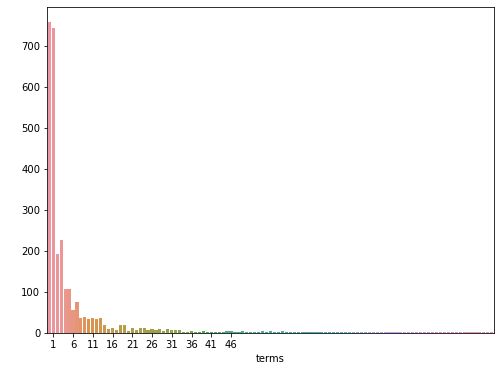

In [36]:
plt.figure(figsize=(8,6))

ax = sns.countplot(frequencies)
plt.xticks(np.arange(1, 50, step=5), np.arange(1, 50, step=5))

plt.xlabel('terms')
plt.ylabel(' ')
plt.show()

In [44]:
# We currently have way too many words, which will make it hard to train our models and may lead to overfitting. 
# So we only keep terms that appear in 0.5% or more of the sells.

# 5% of the sells or more (appears in 28 or more):

countvec2 = CountVectorizer(min_df=0.05)
sparse_dtm2 = countvec2.fit_transform(text_detokenized)

dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names(), index=sell.index)
dtm2.sum().sort_values(ascending=False)

experi    661
work      487
year      437
manag     288
assist    249
         ... 
outgo      29
inject     29
stabil     29
fulli      28
staff      28
Length: 174, dtype: int64

## 3. Supervised Learning

In [46]:
from sklearn.model_selection import train_test_split

y = sell['G/B'].astype('int32')
X = dtm2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((379, 174), (163, 174))

In [47]:
print(y_train.value_counts())
print(y_test.value_counts())

0    203
1    176
Name: G/B, dtype: int64
0    88
1    75
Name: G/B, dtype: int64


In [48]:
# Baseline accuracy
print('ACC', 88/(88 + 75))

ACC 0.5398773006134969


### 3.1 Logistic Regression

In [51]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=88)

In [52]:
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[63 25]
 [18 57]]

Accuracy: 0.7361963190184049


### 3.2 Decision Tree Classifier with CV

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train)

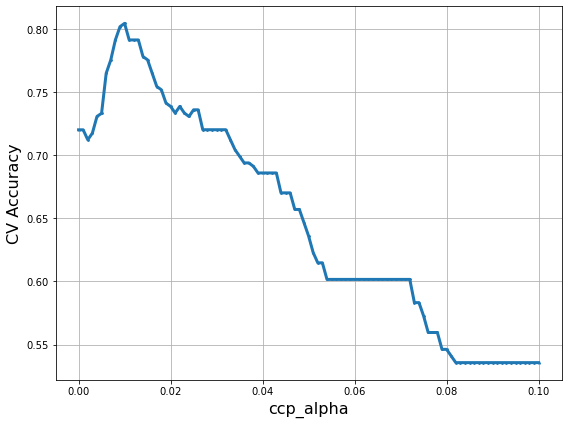

Best ccp_alpha {'ccp_alpha': 0.01}


In [54]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 15


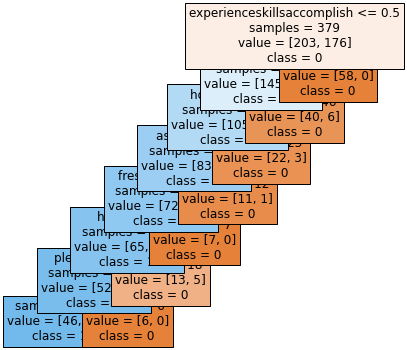

In [55]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [56]:
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[62 26]
 [10 65]]

Accuracy: 0.7791411042944786


### 3.3 Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [58]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[62 26]
 [ 7 68]]

Accuracy: 0.7975460122699386


### 3.4 Random Forest Classifier with CV

In [59]:
import time

grid_values = {'max_features': np.linspace(1,120,120, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [100],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 104.41 s


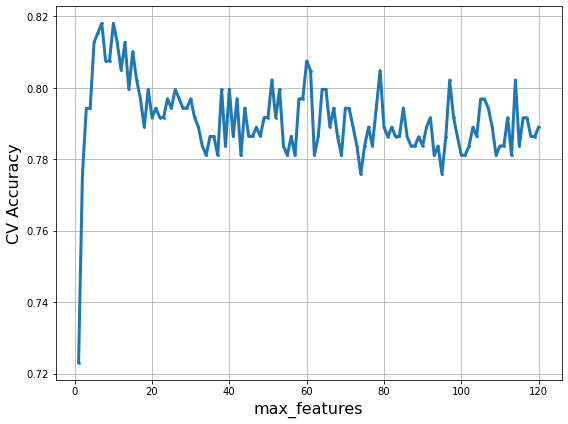

Best parameters {'max_features': 7, 'min_samples_leaf': 5, 'n_estimators': 100, 'random_state': 88}


In [60]:
max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=3)
plt.plot(max_features, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best parameters', rf_cv.best_params_)

In [61]:
y_pred = rf_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[62 26]
 [ 9 66]]

Accuracy: 0.7852760736196319


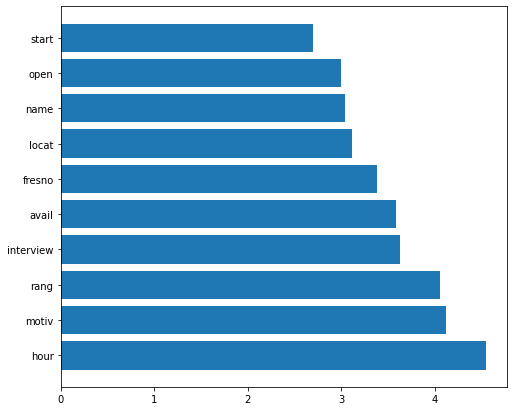

In [62]:
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()

feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8,7))
plt.barh(feature_names[:10], 100*feature_importances[:10])
plt.show()

### 3.5 Linear Discriminant Analysis

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [64]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[56 32]
 [17 58]]

Accuracy: 0.6993865030674846


## 4. Conclusion

Compare the Accuracy of the 5 models, we have:

Logistic Regression: 0.7362

Decision Tree Classifier with CV: 0.7791

Random Forest Classifier: 0.7975

Random Forest Classifier with CV: 0.7853

Linear Discriminant Analysis: 0.6994